In [ ]:
from random import randint
import time
import serial

In [ ]:

def generate_packets(n, payload_length):
    def generate_payload(payload_length):
        if not payload_length == -1:
            return "".join([str(randint(0, 9)) for _ in range(payload_length)])
        else:
            return "".join([str(randint(0, 9)) for _ in range(randint(1, 256))])
    
    time_of_generation = int(time.time())

    return ["SOT", f"TIME={time_of_generation}"] + [generate_payload(payload_length) for _ in range(n)] + ["EOT"], time_of_generation

In [ ]:
packets, _time = generate_packets(10, -1)
packets

In [ ]:
device = serial.Serial("COM8", 115200)

In [ ]:
def AT(device, command: str, timeout=10):
    start_time = time.time()
    device.write((command + "\n").encode())
    response = ""
    
    while "OK" not in response:
        response = device.read_all().decode()
        if "error" in response.lower():
            return "ERROR"
        if ((time.time()-start_time) > 10):
            return "TIMEOUT"

    return "OK"

In [ ]:
AT(device, "AT+SEND=eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee")

In [ ]:
device.close()

In [ ]:
response = device.read_all().decode()
response = response

In [ ]:
print(response)

In [ ]:
generate_packets(20, 50)

In [2]:
import pandas as pd
import os

In [3]:
l = os.listdir("./data/experiment datarates/")

df = pd.DataFrame()
for item in l:
    df[f"{item.split('.')[0]}"] = pd.read_csv(f"./data/experiment datarates/{item}")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [4]:
l = [1,2,5,10,15,20,27]
df = pd.DataFrame()
for item in l:
    df[f"{item} dbm"] = pd.read_csv(f"./data/experiment txp/{item} db.csv")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [107]:
l = [2,8,16,32,64,128,200,256]

df = pd.DataFrame()
for item in l:
    df[f"{item} bytes"] = pd.read_csv(f"./data/experiment payload/{item} byte.csv")["AoI"]
df.index.name="Time"
df.index = df.index * 30

In [5]:
import numpy as np
from plotly import express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

,mean,std
1 db,446,64
2 db,252,58
5 db,275,69
10 db,249,57
15 db,248,58
20 db,250,58
27 db,248,58


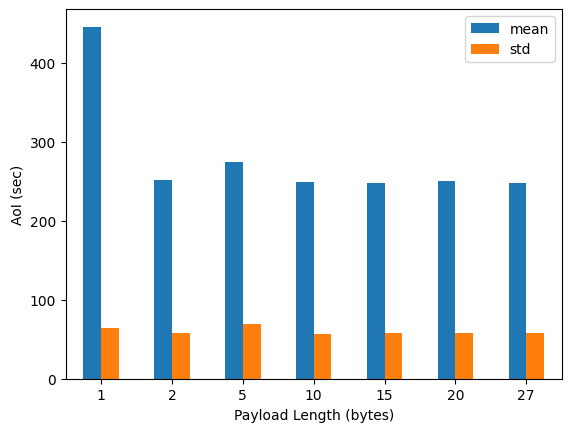

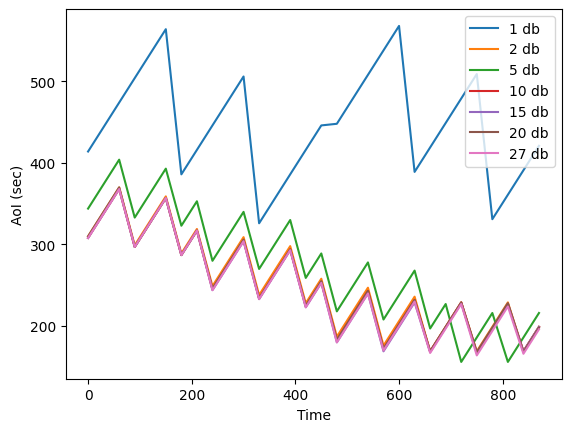

In [6]:
avgs, stds = np.mean(df.to_numpy(), axis=0).astype(int), np.std(df.to_numpy(),axis=0).astype(int)
aggs = pd.DataFrame({"mean": avgs, "std": stds}, index=df.columns)
display(aggs)
ax = aggs.plot.bar()

ax.set_xticklabels(aggs.index.map(lambda x: x.split()[0]), rotation = 0)
ax.set_xlabel("Trasmission power (dbm)")
ax.set_ylabel("AoI (sec)")
plt.show()

ax = df.plot.line()
ax.set_ylabel("AoI (sec)")
plt.show()

C:\Users\vedan\AppData\Local\Temp\ipykernel_6420\852158785.py:6: RuntimeWarning: overflow encountered in exp
  y_fitted = a * np.exp(b * x_fitted)
C:\Users\vedan\AppData\Local\Temp\ipykernel_6420\852158785.py:6: RuntimeWarning: overflow encountered in multiply
  y_fitted = a * np.exp(b * x_fitted)
